## Prepare Notebook

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

## Read Data

In [32]:
kitas_raw_df = pd.read_excel(io='../Data/kitaliste_aktuell.xlsx', skiprows=4)

In [33]:
kitas_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Betreuungsbezirk Nr  2739 non-null   int64  
 1   Betreuungsbezirk     2739 non-null   object 
 2   Einrichtungsnummer   2739 non-null   int64  
 3   Einrichtungsname     2739 non-null   object 
 4   Einrichtungsadresse  2739 non-null   object 
 5   PLZ                  2739 non-null   int64  
 6   Ort                  2739 non-null   object 
 7   Telefon              2708 non-null   object 
 8   Anzahl Plätze        2736 non-null   float64
 9   Einrichtungsart      2739 non-null   object 
 10  Trägernummer         2739 non-null   int64  
 11  Trägername           2739 non-null   object 
 12  Trägerart            2739 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 278.3+ KB


In [34]:
kitas_raw_df['Ort'].unique()

array(['Berlin'], dtype=object)

In [35]:
kitas_raw_df[['Betreuungsbezirk Nr', 'Betreuungsbezirk']].drop_duplicates()

,Betreuungsbezirk Nr,Betreuungsbezirk
0,1,Mitte
329,2,Friedrichshain-Kreuzberg
620,3,Pankow
994,4,Charlottenburg-Wilmersdorf
1261,5,Spandau
1403,6,Steglitz-Zehlendorf
1602,7,Tempelhof-Schöneberg
1863,8,Neukölln
2096,9,Treptow-Köpenick
2287,10,Marzahn-Hellersdorf


In [36]:
kitas_df = kitas_raw_df.copy().drop(['Betreuungsbezirk Nr', 'Ort'], axis=1)

## EDA

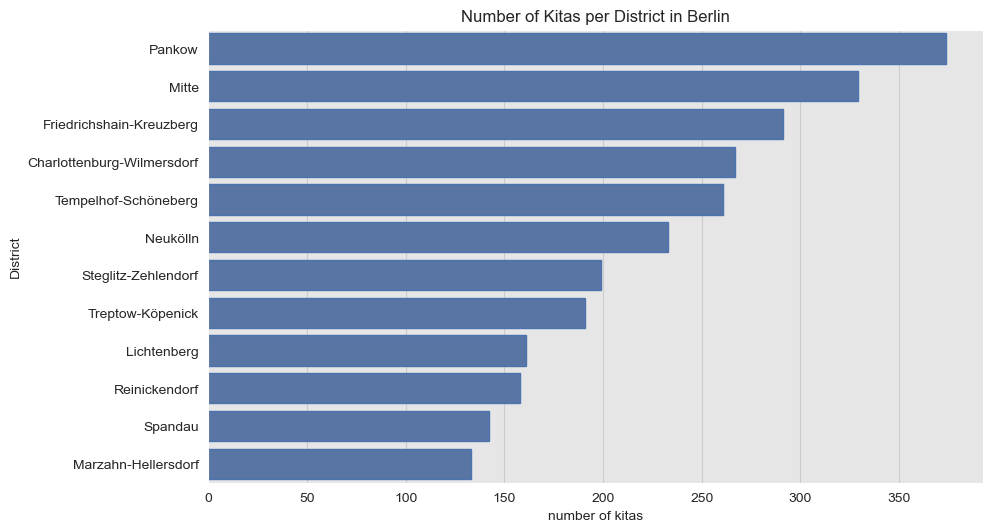

In [37]:
fig, ax = plt.subplots()

kitas_df \
    .groupby(['Betreuungsbezirk']) \
    .agg(n=('Einrichtungsname', 'count')) \
    .reset_index(drop=False) \
    .sort_values('n', ascending=False) \
    .pipe((sns.barplot, 'data'), 
        x='n', 
        y='Betreuungsbezirk',
        color=sns_c[0],
        edgecolor=sns_c[0],
        ax=ax
    )
ax.set(
    title='Number of Kitas per District in Berlin', 
    xlabel='number of kitas', 
    ylabel='District'
);

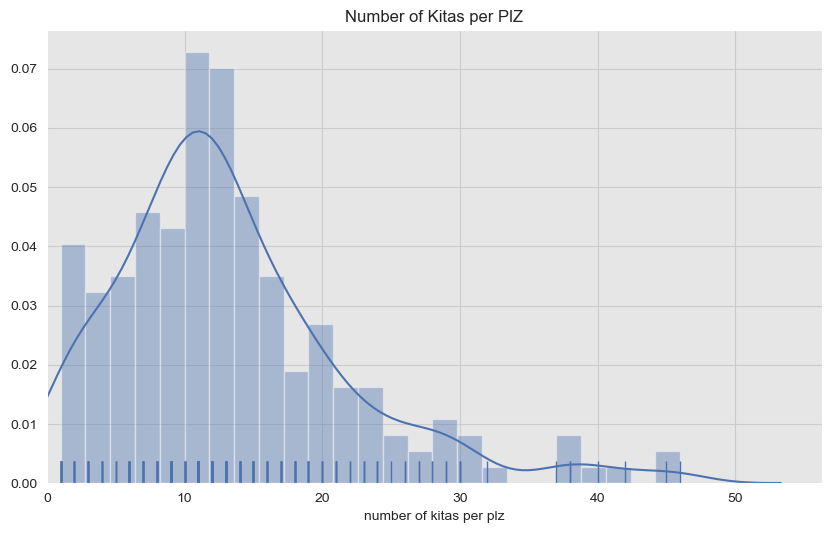

In [56]:
fig, ax = plt.subplots()

kitas_df \
    .groupby(['Betreuungsbezirk', 'PLZ']) \
    .agg(n=('Einrichtungsname', 'count')) \
    ['n'] \
    .pipe((sns.distplot, 'a'), 
        bins=25,
        rug=True, 
        ax=ax
    )
ax.set(
    title='Number of Kitas per PlZ', 
     xlabel='number of kitas per plz',
     xlim=(0, None)
);

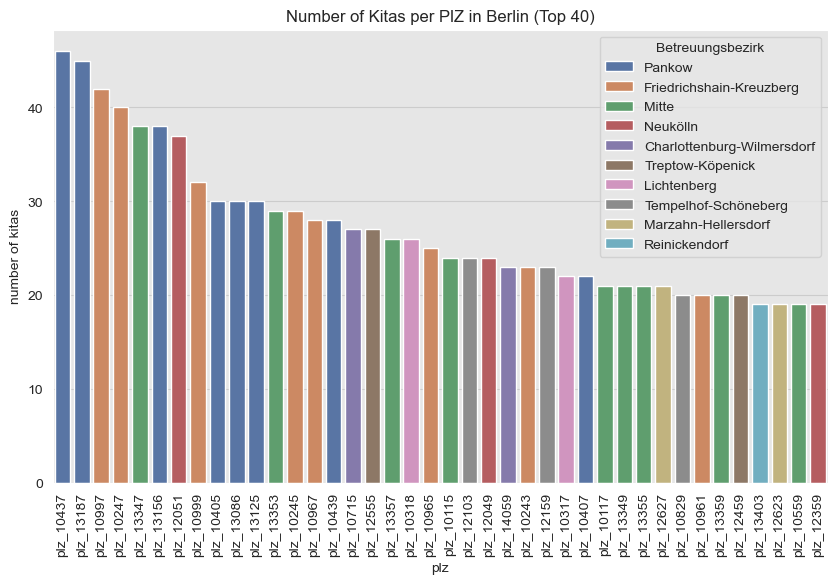

In [39]:
fig, ax = plt.subplots()

kitas_df \
    .groupby(['Betreuungsbezirk', 'PLZ']) \
    .agg(n=('Einrichtungsname', 'count')) \
    .reset_index(drop=False) \
    .assign(PLZ = lambda x: 'plz_' + x['PLZ'].astype(str)) \
    .sort_values('n', ascending=False) \
    .head(40) \
    .pipe((sns.barplot, 'data'),  
        x='PLZ',
        y='n',
        hue='Betreuungsbezirk',
        dodge=False,
        ax=ax
    )
ax.tick_params(axis='x', labelrotation=90)
ax.set(
    title='Number of Kitas per PlZ in Berlin (Top 40)', 
     xlabel='plz', 
     ylabel='number of kitas', 
);

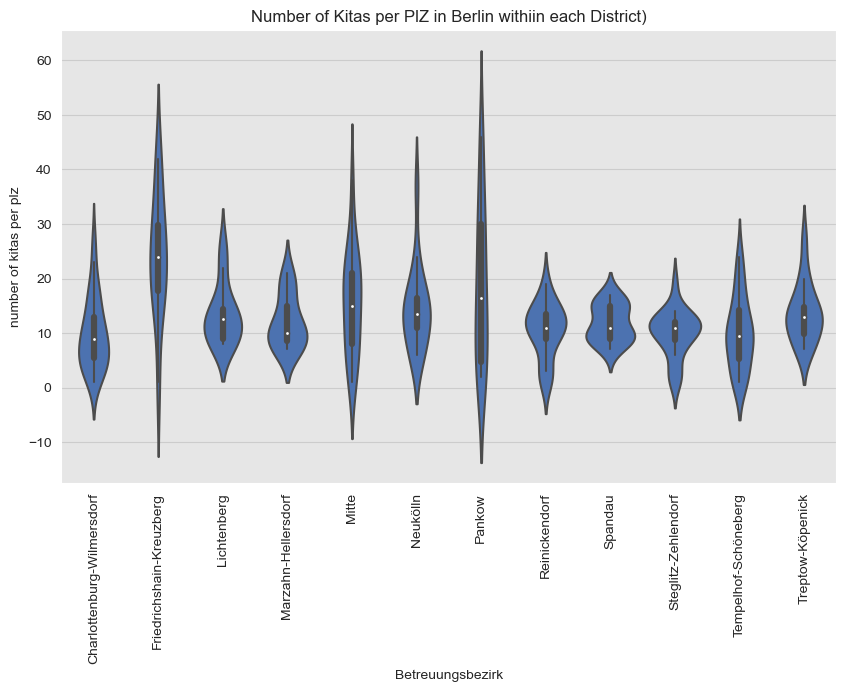

In [68]:
fig, ax = plt.subplots()

kitas_df \
    .groupby(['Betreuungsbezirk', 'PLZ']) \
    .agg(n=('Einrichtungsname', 'count')) \
    .reset_index(drop=False) \
    .pipe((sns.violinplot, 'data'), 
        x='Betreuungsbezirk', 
        y='n',
        color=sns_c[0],
        saturation=1.0,
        ax=ax
    )

ax.tick_params(axis='x', labelrotation=90)
ax.set(
    title='Number of Kitas per PlZ in Berlin withiin each District)', 
     ylabel='number of kitas per plz', 
);

In [59]:
kitas_df

,Betreuungsbezirk,Einrichtungsnummer,Einrichtungsname,Einrichtungsadresse,PLZ,Telefon,Anzahl Plätze,Einrichtungsart,Trägernummer,Trägername,Trägerart
0,Mitte,1010010,Kita F.A.I.R.play,Albrechtstr. 020,10117,281 64 73,69.0,Kindertagesstätte,1224,GFJ - gemeinnützige Gesellschaft für Familien-...,Sonstiger freier Träger
1,Mitte,1010020,Kita Kinderwelt,An der Kolonnade 003-5,10117,2291378,155.0,Kindertagesstätte,1334,Forum Soziale Dienste GmbH,Sonstiger freier Träger
2,Mitte,1010030,FRÖBEL Kindergarten Casa Fantasia,Anklamer Str. 038,10115,4498171,69.0,Kindertagesstätte,1227,Fröbel Bildung und Erziehung gGmbH,Sonstiger freier Träger
3,Mitte,1010080,Kita Regenbogen,Fehrbelliner Str. 080,10119,449 32 38,91.0,Kindertagesstätte,1202,Pfefferwerk Stadtkultur gGmbH,Sonstiger freier Träger
4,Mitte,1010100,"FRÖBEL Kindergarten ""Schatzinsel""",Fischerinsel 008,10179,201 37 88,241.0,Kindertagesstätte,1227,Fröbel Bildung und Erziehung gGmbH,Sonstiger freier Träger
...,...,...,...,...,...,...,...,...,...,...,...
2734,Reinickendorf,12202330,Kita Uranuskids,Uranusweg 003,13405,46996066,60.0,Kindertagesstätte,8675,fidea Bildung gGmbH,Sonstiger freier Träger
2735,Reinickendorf,12202360,Ginsterkatze,Avenue Charles de Gaulle 007-9,13469,33958980,55.0,Kindertagesstätte,8235,Trägerwerk Soziale Dienste in Berlin und Brand...,Sonstiger freier Träger
2736,Reinickendorf,12202370,GU Senftenberger Ring (FBO),Senftenberger Ring 037-39,13435,NaN,12.0,Eltern-Kind-Gruppe,7319,Verein für Berliner Stadtmission e. V.,Diakonisches Werk
2737,Reinickendorf,12202380,Sprachfördergruppe Babelfisch (nur Sprachförde...,Nimrodstr. 004-14,13469,NaN,25.0,Kindertagesstätte,1129,Stiftung Pro Gemeinsinn gGmbH,Sonstiger freier Träger


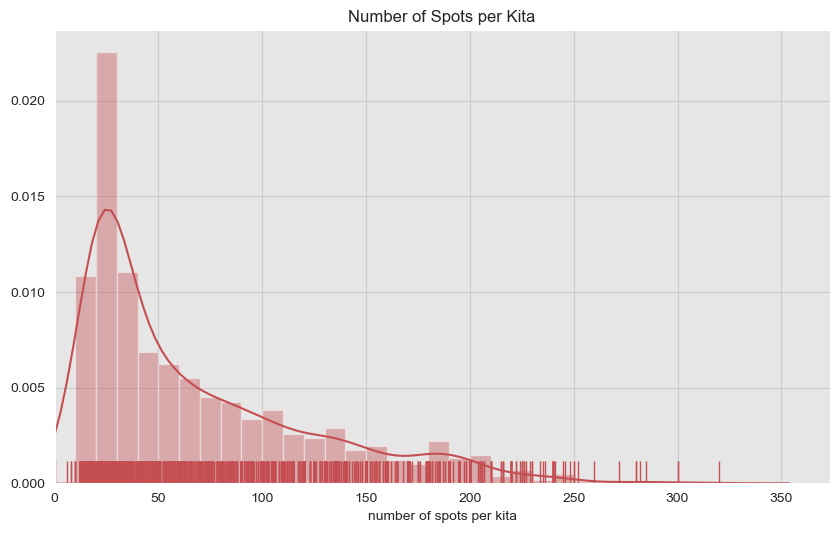

In [66]:
fig, ax = plt.subplots()
sns.distplot(a=kitas_df['Anzahl Plätze'], rug=True, color=sns_c[3], ax=ax)
ax.set(
    title='Number of Spots per Kita', 
     xlabel='number of spots per kita',
     xlim=(0, None)
);

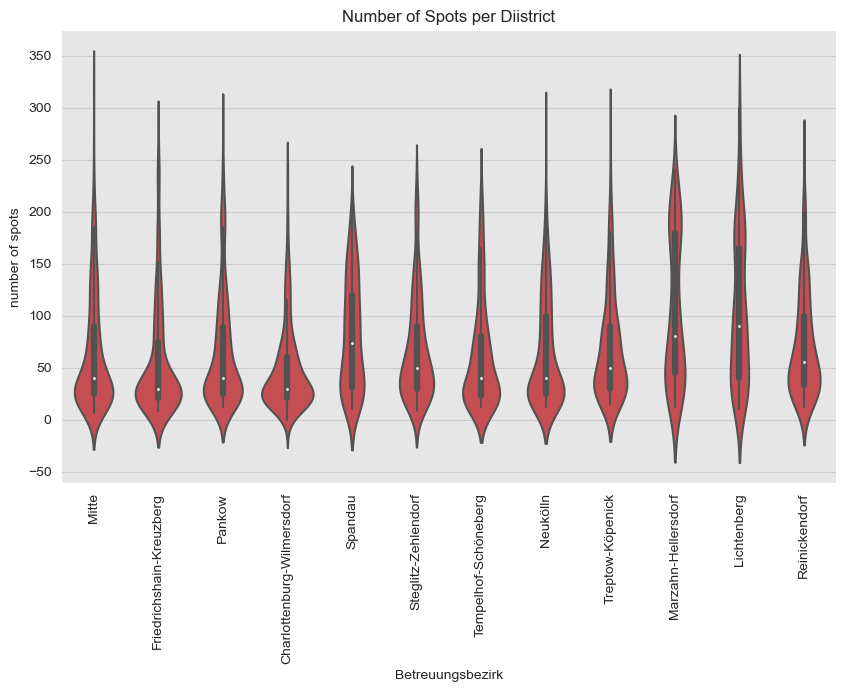

In [71]:
fig, ax = plt.subplots()

kitas_df \
    .pipe((sns.violinplot, 'data'), 
        x='Betreuungsbezirk', 
        y='Anzahl Plätze',
        color=sns_c[3],
        saturation=1.0,
        ax=ax
    )

ax.tick_params(axis='x', labelrotation=90)
ax.set(
    title='Number of Spots per Diistrict', 
     ylabel='number of spots', 
);

In [80]:
kitas_df = kitas_df.assign(num_kitas_plz=lambda x: x.groupby(['Betreuungsbezirk', 'PLZ'])['Einrichtungsname'].transform('count'))

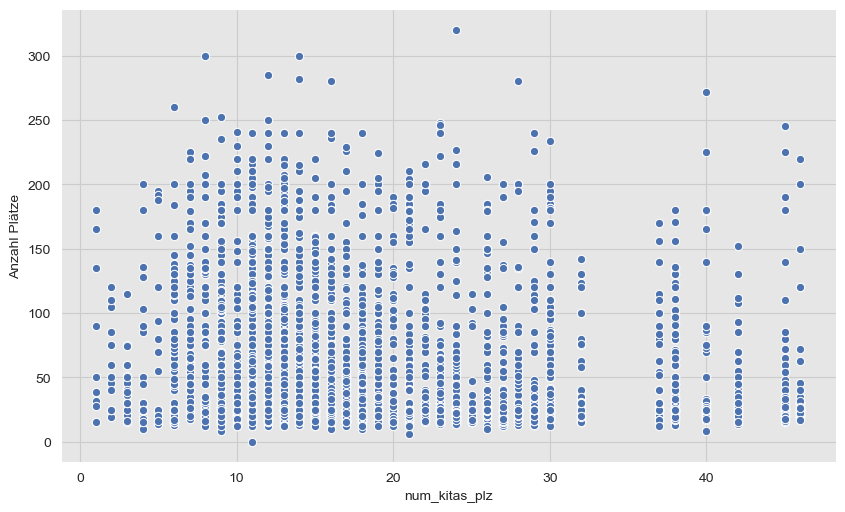

In [97]:
fig, ax = plt.subplots()
sns.scatterplot(x='num_kitas_plz', y='Anzahl Plätze', data=kitas_df, ax=ax)